In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam




C:\Users\a\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# 출처: https://3months.tistory.com/206 [Deep Play]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8562589866020298375
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9234234737
locality {
  bus_id: 1
}
incarnation: 1088336075420756858
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
workdir = "path" # please set the path where the dataset located in

# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//MDG160K
dataset = np.load(workdir + "//190320_cls4_druginfo_change.npz") # MDG160K input file
ss0 = np.load(workdir + '//190315_shuffle_split_r0.npz') # split for training set and test set

In [4]:
x = dataset['x']
y = dataset['y_lnIC50']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [5]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [6]:
# In[15]:
ab =[]
for i in range(100,300):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

2 24


In [7]:
x.shape

(160375, 23538)

In [8]:
training_image_array.shape

(144338, 23538)

In [9]:
# In[21]: Hyper parameter section

num_classes = 1
learning_rate = 0.0002
training_epochs = 150
batch_size = 100
img_rows, img_cols = 154, 154


In [10]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [11]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
#input_shape = (img_rows, img_cols, 1)

In [12]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(144338, 23538, 1) (144338,) (16037, 23538, 1) (16037,)


In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (144338, 23538, 1)
144338 train samples
16037 test samples


In [14]:
training_image_array.shape

(144338, 23538)

In [15]:
# Model architecture

with K.tf.device('/GPU:0'):
    inputs = Input(shape=(train_X.shape[1],1),name='inputs')

    x = Conv1D(16, kernel_size=3, strides=2, padding="same")(inputs)
    x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
#     y = x
    x = Activation('tanh')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)
    
    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
    x = Conv1D(32, kernel_size=3, strides=2, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
#     x = BatchNormalization()(x)
        
    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
        
    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=2, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
#     x = BatchNormalization()(x)
        
    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
        
    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

#     x = AveragePooling1D(pool_size=8)(x)
    x = Flatten()(x)
    x = Dense(units=2048, name='dense1'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout1') (x)
    x = Activation('relu')(x)

#    x = Reshape((300,1))(x)

#    x = Conv1D(30, kernel_size=150, strides=1, activation = 'relu')(x)
#    x = MaxPooling1D(pool_size=2)(x)
#    x = BatchNormalization()(x)

    x = Dense(units=1024, name='dense5'  ) (x)
    x = BatchNormalization()(x)
    y = x
    x = Dropout(0.1, name='dropout5') (x)
    x = Activation('relu')(x)

    x = Dense(units=512, name='dense6'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout6') (x)
    x = Activation('relu')(x)

    x = Dense(units=1024, name='dense7'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout7') (x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
    x = Dense(units=512, name='dense8'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout8') (x)
    x = Activation('relu')(x)
    
    x = Dense(units=256, name='dense9'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout9') (x)
    x = Activation('relu')(x)

    x = Dense(units=128, name='dense10'  ) (x)
    x = BatchNormalization()(x)
    y = x
    x = Dropout(0.1, name='dropout10') (x)
    x = Activation('relu')(x)


    predictions = Dense(1, activation='linear', name='predictions', kernel_initializer='he_normal')(x)

    

    model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN20190327')
    model.compile(loss=keras.losses.mean_squared_error,
                  optimizer=keras.optimizers.Adam(learning_rate),
                  metrics=['mse','mae'])


    model.summary()


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 23538, 1)     0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 11769, 16)    64          inputs[0][0]                     
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 2353, 16)     0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 2353, 16)     64          max_pooling1d_1[0][0]            
__________________________

In [16]:
# Model fitting

StartTime8 = datetime.now()
print("StartTime :", StartTime8)
with K.tf.device('/GPU:0'):
    model_train = model.fit(train_X, training_label_array, batch_size=batch_size,epochs=training_epochs,verbose=1,
                        validation_data=(test_X, test_label_array))

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2019-05-11 23:10:51.941345
Train on 144338 samples, validate on 16037 samples
Epoch 1/150
144338/144338 [==============================] - 219s 2ms/step - loss: 2.3809 - mean_squared_error: 2.3809 - mean_absolute_error: 1.1645 - val_loss: 1.7788 - val_mean_squared_error: 1.7788 - val_mean_absolute_error: 1.0023
Epoch 2/150
144338/144338 [==============================] - 214s 1ms/step - loss: 1.7549 - mean_squared_error: 1.7549 - mean_absolute_error: 0.9988 - val_loss: 1.5495 - val_mean_squared_error: 1.5495 - val_mean_absolute_error: 0.9289
Epoch 3/150
144338/144338 [==============================] - 213s 1ms/step - loss: 1.5516 - mean_squared_error: 1.5516 - mean_absolute_error: 0.9371 - val_loss: 1.4778 - val_mean_squared_error: 1.4778 - val_mean_absolute_error: 0.9065
Epoch 4/150
144338/144338 [==============================] - 213s 1ms/step - loss: 1.3964 - mean_squared_error: 1.3964 - mean_absolute_error: 0.8888 - val_loss: 1.3662 - val_mean_squared_error: 1.3662 - va

Epoch 70/150
144338/144338 [==============================] - 213s 1ms/step - loss: 0.1046 - mean_squared_error: 0.1046 - mean_absolute_error: 0.2472 - val_loss: 0.9163 - val_mean_squared_error: 0.9163 - val_mean_absolute_error: 0.6808
Epoch 71/150
144338/144338 [==============================] - 213s 1ms/step - loss: 0.1037 - mean_squared_error: 0.1037 - mean_absolute_error: 0.2467 - val_loss: 0.9181 - val_mean_squared_error: 0.9181 - val_mean_absolute_error: 0.6840
Epoch 72/150
144338/144338 [==============================] - 213s 1ms/step - loss: 0.1017 - mean_squared_error: 0.1017 - mean_absolute_error: 0.2442 - val_loss: 0.9058 - val_mean_squared_error: 0.9058 - val_mean_absolute_error: 0.6799
Epoch 73/150
144338/144338 [==============================] - 213s 1ms/step - loss: 0.1030 - mean_squared_error: 0.1030 - mean_absolute_error: 0.2449 - val_loss: 0.9172 - val_mean_squared_error: 0.9172 - val_mean_absolute_error: 0.6830
Epoch 74/150
144338/144338 [============================

Epoch 105/150
144338/144338 [==============================] - 213s 1ms/step - loss: 0.0810 - mean_squared_error: 0.0810 - mean_absolute_error: 0.2150 - val_loss: 0.9165 - val_mean_squared_error: 0.9165 - val_mean_absolute_error: 0.6748
Epoch 106/150
144338/144338 [==============================] - 213s 1ms/step - loss: 0.0767 - mean_squared_error: 0.0767 - mean_absolute_error: 0.2102 - val_loss: 0.9256 - val_mean_squared_error: 0.9256 - val_mean_absolute_error: 0.6807
Epoch 107/150
144338/144338 [==============================] - 213s 1ms/step - loss: 0.0766 - mean_squared_error: 0.0766 - mean_absolute_error: 0.2099 - val_loss: 0.9154 - val_mean_squared_error: 0.9154 - val_mean_absolute_error: 0.6774
Epoch 108/150
144338/144338 [==============================] - 213s 1ms/step - loss: 0.0752 - mean_squared_error: 0.0752 - mean_absolute_error: 0.2083 - val_loss: 0.9133 - val_mean_squared_error: 0.9133 - val_mean_absolute_error: 0.6766
Epoch 109/150
144338/144338 [=======================

In [17]:
# Save model architecture and its weight

import json
from keras.models import model_from_json, load_model
workdir = "C://Users//a//Desktop//Ronny_TF//Ronny_Deep_vs_CDRscan//DeepIC50v2_epoch_150"
# Option 1: Save Weights + Architecture
model.save_weights(workdir+ '//model_fix_v3.h5')
with open(workdir + '//model_architecture_fix_v3.json', 'w') as f:
    f.write(model.to_json())
# Option 1: Load Weights + Architecture
# with open('model_architecture.json', 'r') as f:
#     new_model_1 = model_from_json(f.read())
# new_model_1.load_weights('model_weights.h5')

In [18]:
# Option 2: Save/Load the Entire Model
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save(workdir + '//model_fix_2080ti_v3.h5')

# Deletes the existing model
# del model  

# Returns a compiled model identical to the previous one
# model = load_model('my_model.h5')

In [19]:
test_eval = model.evaluate(test_X, test_label_array, verbose=1)

16037/16037 [==============================] - 8s 478us/step


In [20]:
test_eval

[0.933780104284268, 0.933780104284268, 0.6807030336907538]

In [21]:
# mse and loss monitor

accuracy = model_train.history['mean_squared_error']
val_accuracy = model_train.history['val_mean_squared_error']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

In [22]:
np.savetxt("190510_DeepIC50v2_fix_2080ti_v3.csv", np_acc, delimiter=",")
np.savetxt("190510_DeepIC50v2_fixval_acc_cls3_fix_2080ti_v3.csv", np_val_acc, delimiter=",")
np.savetxt("190510_DeepIC50v2_fixloss_cls3_fix_2080ti_v3.csv", np_loss, delimiter=",")
np.savetxt("190510_DeepIC50v2_fixval_loss_cls3_fix_2080ti_v3.csv", np_val_loss, delimiter=",")

FileNotFoundError: [Errno 2] No such file or directory: '//190510_DeepIC50v2_fix_2080ti_v3.csv'

In [23]:
import matplotlib
from matplotlib import pyplot as plt

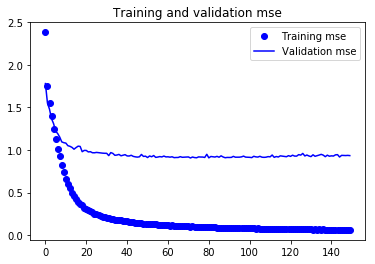

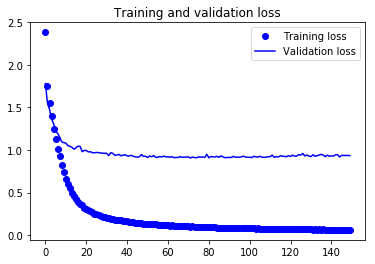

In [24]:
# accuracy = model_train.history['acc']
# val_accuracy = model_train.history['val_acc']
# loss = model_train.history['loss']
# val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(workdir + '//mse_loss_plot.png')
plt.show()

In [25]:
# test validation
predicted_classes = model.predict(test_X)

In [26]:
predicted_value = predicted_classes

In [27]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [28]:
c.to_csv(workdir + '//190510_DeepIC50v2_epoch_150_result.csv')

In [29]:
c

,Predicted,Test
0,0.967704,1.158653
1,4.843003,5.321962
2,2.800345,3.624203
3,4.667946,3.054980
4,-3.658939,-3.985187
5,7.385154,5.948850
6,3.599374,3.928832
7,-2.885066,-2.823335
8,4.478412,4.139350
9,1.056967,1.180256


In [30]:
predicted_value.shape

(16037, 1)

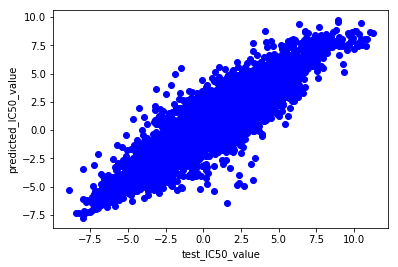

In [31]:
# scatter plot as test validation
plt.scatter(test_label_array,predicted_value,c='blue')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//190510_DeepIC50v2_epoch_150_test_scatterplot.png')

In [32]:
# calculate RMSE

rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 0.9663229722378357


In [ ]:
# R-squared value

from sklearn.metrics import r2_score
r2_value = r2_score(b, a) 
print(r2_value)